Introduction

Fuel prices remain a key economic indicator in South Africa, with significant implications for transportation, logistics, inflation, and household spending. In Gauteng Province—the country's economic hub and most populous region—fuel price fluctuations are particularly impactful, affecting both individual commuters and large-scale commercial operations. As such, analyzing fuel price trends within Gauteng offers valuable insights into broader economic pressures and consumer dynamics at the provincial level.

This data analysis focuses on the retail prices of petrol and diesel in Gauteng during the years 2024 and 2025. Using monthly fuel price data published by the Department of Mineral Resources and Energy (DMRE), along with supplementary macroeconomic indicators such as the rand-to-dollar exchange rate and international Brent crude oil prices, this report explores the key drivers behind fuel price changes in the province.

The goal of this analysis is to identify patterns, highlight major price shifts, and understand the local impact of global and national economic developments. Given Gauteng’s central role in South Africa’s transport and trade networks, understanding fuel price dynamics in this province is essential for forecasting inflation, planning logistics operations, and shaping informed policy responses.

In [49]:
#Import relevant libraries:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Load the CSV files
df_2024 = pd.read_csv("Fuel Prices 2024.csv")
df_2025 = pd.read_csv("Gauteng Fuel Prices 2025.csv")

# Show the first few rows of each
print("2024 Data Preview:")
print(df_2024.head(), "\n")
print("Columns:", df_2024.columns.tolist(), "\n")

print("2025 Data Preview:")
print(df_2025.head(), "\n")
print("Columns:", df_2025.columns.tolist())

2024 Data Preview:
        Fuel Prices 2024 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0                     24      3-Jan      7-Feb      6-Mar      3-Apr   
1                COASTAL        NaN        NaN        NaN        NaN   
2         95 LRP (c/l) *    2177,00   225,200     2373,00    2433,00   
3         95 ULP (c/l) *    2177,00   225,200     2373,00    2433,00   
4  Diesel 0.05% (c/l) **    1990,97     2,064     2169,87    2166,09   

  Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  \
0      1-May      5-Jun      3-Jul      7-Aug      4-Sep       2-Oct   
1        NaN        NaN        NaN        NaN        NaN         NaN   
2    2470,00    2346,00    2247,00    2232,00    2140,00     2026,00   
3    2470,00    2346,00    2247,00    2232,00    2140,00     2026,00   
4    2136,09    2017,55    1987,17    1959,17    1880,17     1766,37   

  Unnamed: 11 Unnamed: 12  
0       6-Nov       4-Dec  
1         NaN         NaN  
2     2051,00     2068,00  
3  

In [16]:
# Drop the first 8 rows (keep from index 8 onward, because we are focusing on Gauteng)
df_filtered = df_2024.iloc[8:].reset_index(drop=True)

# Show result
print(f" Data from row index 8 onward (total {len(df_filtered)} rows):")
print(df_filtered.head(10))

 Data from row index 8 onward (total 8 rows):
                     Fuel Prices 2024 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                             GAUTENG        NaN        NaN        NaN   
1                      93 LRP (c/l) *      2,217      2,292      2,413   
2                      93 ULP (c/l) *      2,217      2,292      2,413   
3                      95 ULP (c/l) *      2,249      2,324      2,445   
4               Diesel 0.05% (c/l) **      2,063      2,136      2,242   
5              Diesel 0.005% (c/l) **      2,073      2,143      2,261   
6      Illuminating Paraffin (c/l) **      1,531      1,584      1,648   
7  Liquefied Petroleum Gas (c/kg) ***      3,753      3,790      3,831   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1      2,478      2,515      2,391      2,286      2,271      2,179   
2      2,478      2,515      2,391      2,286      2,271      2,179   
3  

In [17]:
#Find out the highest price of each fuel type in 2024 and the month it took place:
# Drop first 2 header rows, keep structure
df_clean = df.drop([0, 1]).reset_index(drop=True)

# Rename columns: first = Fuel Type, rest = months
df_clean = df_clean.rename(columns={"Fuel Prices 2024": "Fuel Type"})
df_clean.columns = ["Fuel Type"] + list(df.iloc[0, 1:].values)

# Function to clean numbers (remove spaces, fix commas/dots)
def clean_number(x):
    if pd.isna(x):
        return None
    x = str(x).strip().replace(" ", "")
    x = x.replace(".", "")   # remove thousand separators
    x = x.replace(",", ".")  # decimal separator
    try:
        return float(x)
    except:
        return None

# Apply cleaning
for col in df_clean.columns[1:]:
    df_clean[col] = df_clean[col].apply(clean_number)

# Locate GAUTENG section
gauteng_index = df_clean[df_clean["Fuel Type"].str.contains("GAUTENG", na=False)].index[0]

# Extract GAUTENG fuels only (rows after GAUTENG marker)
df_gauteng = df_clean.iloc[gauteng_index+1:].reset_index(drop=True)

# Calculate highest price AND the month it happened
results = {}
for idx, row in df_gauteng.iterrows():
    fuel = row["Fuel Type"]
    prices = row[1:]
    max_price = prices.max()
    max_month = prices.idxmax()
    results[fuel] = {"Highest Price": max_price, "Month": max_month}

# Convert results to a DataFrame for easy display
df_results = pd.DataFrame(results).T

print(df_results)

                                   Highest Price  Month
93 LRP (c/l) *                             2.515  1-May
93 ULP (c/l) *                             2.515  1-May
95 ULP (c/l) *                             2.549  1-May
Diesel 0.05% (c/l) **                      2.245  3-Apr
Diesel 0.005% (c/l) **                     2.261  6-Mar
Illuminating Paraffin (c/l) **             1.648  6-Mar
Liquefied Petroleum Gas (c/kg) ***         3.831  6-Mar


In [40]:
#Find the lowest price of each fuel type and the month it took place:
# Load the CSV (adjust filename if needed in Pyodide)
df = pd.read_csv("Fuel Prices 2024.csv")

# Drop first 2 header rows
df_clean = df.drop([0, 1]).reset_index(drop=True)

# Rename columns: first = Fuel Type, rest = months
df_clean = df_clean.rename(columns={"Fuel Prices 2024": "Fuel Type"})
df_clean.columns = ["Fuel Type"] + list(df.iloc[0, 1:].values)

# Function to clean numbers
def clean_number(x):
    if pd.isna(x):
        return None
    x = str(x).strip().replace(" ", "")
    x = x.replace(".", "")   # remove thousand separators
    x = x.replace(",", ".")  # decimal separator
    try:
        return float(x)
    except:
        return None

# Apply cleaning
for col in df_clean.columns[1:]:
    df_clean[col] = df_clean[col].apply(clean_number)

# Locate GAUTENG section
gauteng_index = df_clean[df_clean["Fuel Type"].str.contains("GAUTENG", na=False)].index[0]

# Extract GAUTENG fuels only
df_gauteng = df_clean.iloc[gauteng_index+1:].reset_index(drop=True)

# Calculate lowest price AND the month it happened
results = {}
for idx, row in df_gauteng.iterrows():
    fuel = row["Fuel Type"]
    prices = row[1:]
    min_price = prices.min()
    min_month = prices.idxmin()
    results[fuel] = {"Lowest Price": min_price, "Month": min_month}

# Convert results to DataFrame for display
df_results = pd.DataFrame(results).T

print(df_results)

                                   Lowest Price  Month
93 LRP (c/l) *                            2.073  2-Oct
93 ULP (c/l) *                            2.073  2-Oct
95 ULP (c/l) *                            2.105  2-Oct
Diesel 0.05% (c/l) **                     1.845  2-Oct
Diesel 0.005% (c/l) **                    1.857  2-Oct
Illuminating Paraffin (c/l) **            1.266  2-Oct
Liquefied Petroleum Gas (c/kg) ***        3.585  4-Sep


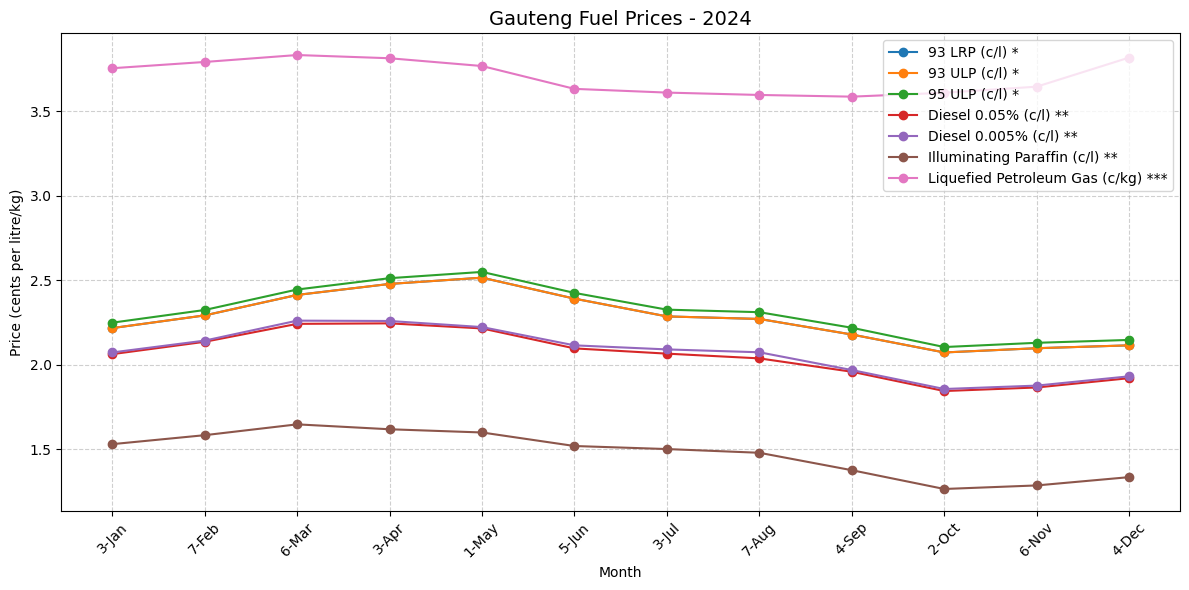

In [41]:
#Visualise the data for the year 2024:
# Plot Gauteng prices across 2024
plt.figure(figsize=(12,6))

for idx, row in df_gauteng.iterrows():
    fuel = row["Fuel Type"]
    prices = row[1:]
    plt.plot(prices.index, prices.values, marker="o", label=fuel)

plt.title("Gauteng Fuel Prices - 2024", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price (cents per litre/kg)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [47]:
#Find the highest price for each fuel type in 2025 and the month it took place:
# Step 1: Create a function to clean numbers
df_clean = df.drop([0, 1]).reset_index(drop=True)

# Rename columns: first = Fuel Type, rest = months
df_clean = df_clean.rename(columns={"Gauteng Fuel Prices 2025": "Fuel Type"})
df_clean.columns = ["Fuel Type"] + list(df.iloc[0, 1:].values)
def clean_number(x):
    if pd.isna(x):
        return None
    x = str(x).strip().replace(" ", "")
    x = x.replace(".", "")   # remove thousand separators
    x = x.replace(",", ".")  # decimal separator
    try:
        return float(x)
    except:
        return None

#Step 2: Apply cleaning
for col in df_clean.columns[1:]:
    df_clean[col] = df_clean[col].apply(clean_number)

# Step 3: Calculate highest price and the month it happened
results = {}
for idx, row in df_clean.iterrows():
    fuel = row["Fuel Type"]
    prices = row[1:]
    max_price = prices.max()
    max_month = prices.idxmax()

    results[fuel] = {"Highest Price": max_price, "Month": max_month}

#Step 4: Convert results to DataFrame for easy display
df_results = pd.DataFrame(results).T

print("Highest fuel prices for Gauteng (2025):")
print(df_results)

Highest fuel prices for Gauteng (2025):
                                   Highest Price     Month
93 ULP (c/l) *                             2.216  5-Feb-25
95 ULP (c/l) *                             2.241  5-Feb-25
Diesel 0.05% (c/l) **                      2.034  5-Feb-25
Diesel 0.005% (c/l) **                     2.044  5-Feb-25
Illuminating Paraffin (c/l) **             1.423  5-Feb-25
Liquefied Petroleum Gas (c/kg) ***         3.858  5-Feb-25


In [28]:
#Print the lowest fuel prices for each fuel type in 2025 and the month it took place: 
print("Lowest fuel prices for Gauteng (2025):")
print(df_results)

Lowest fuel prices for Gauteng (2025):
                                   Highest Price     Month
93 ULP (c/l) *                           22160.0  5-Feb-25
95 ULP (c/l) *                           22410.0  5-Feb-25
Diesel 0.05% (c/l) **                    20340.0  5-Feb-25
Diesel 0.005% (c/l) **                   20440.0  5-Feb-25
Illuminating Paraffin (c/l) **           14230.0  5-Feb-25
Liquefied Petroleum Gas (c/kg) ***       38580.0  5-Feb-25


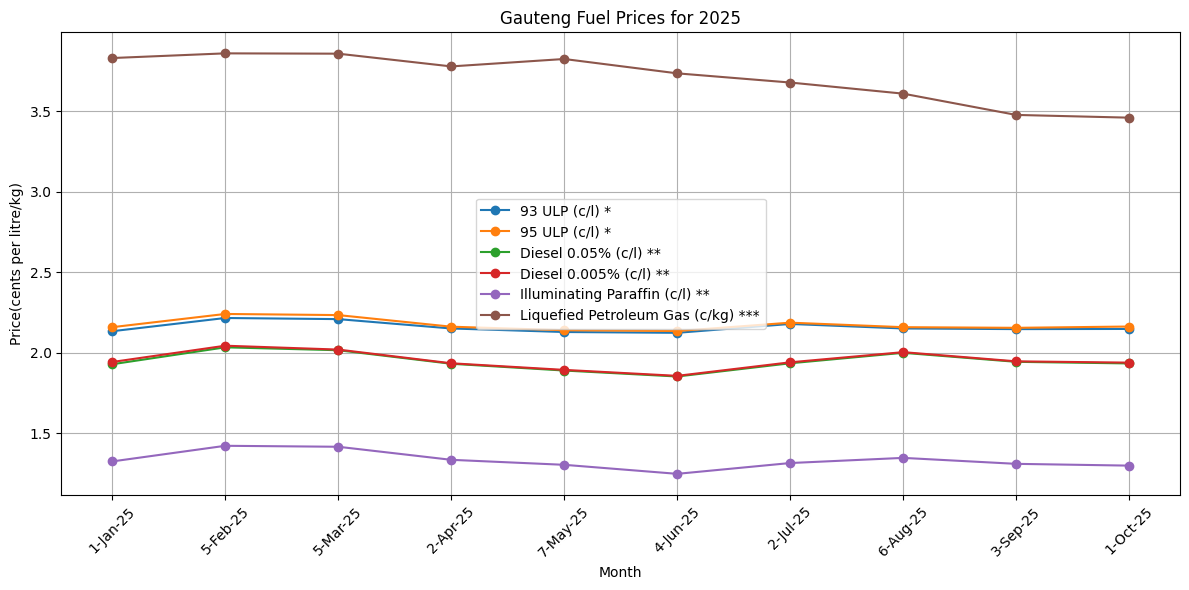

In [48]:
#Visualise the fuel prices for 2025:
  # --- Load CSV and clean ---
df = pd.read_csv("Gauteng Fuel Prices 2025.csv")
df_clean = df.drop([0, 1]).reset_index(drop=True)

# Rename columns: first = Fuel Type, rest = months
df_clean = df_clean.rename(columns={"Fuel Prices 2025": "Fuel Type"})
df_clean.columns = ["Fuel Type"] + list(df.iloc[0, 1:].values)

# Function to clean numbers
def clean_number(x):
    if pd.isna(x):
        return None
    x = str(x).strip().replace(" ", "").replace(".", "").replace(",", ".")
    try:
        return float(x)
    except:
        return None

for col in df_clean.columns[1:]:
    df_clean[col] = df_clean[col].apply(clean_number)
# --- Visualization ---
plt.figure(figsize=(12, 6))

for idx, row in df_clean.iterrows():
    fuel_type = row["Fuel Type"]
    prices = row[1:]
    plt.plot(prices.index, prices.values, marker='o', label=fuel_type)

plt.title("Gauteng Fuel Prices for 2025")
plt.xlabel("Month")
plt.ylabel("Price(cents per litre/kg)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Gauteng Fuel Price Trends: 2024 vs 2025

Comparing fuel prices over 2024 and 2025, several patterns emerge. Overall, prices across all fuel types (Petrol 93, Petrol 95, Diesel, and LPG) remained volatile, reflecting global oil market fluctuations and domestic adjustments. While 2024 showed mid-year peaks and a gradual rise toward year-end, 2025 experienced similar mid-year and end-of-year price surges but at slightly higher average levels, indicating an overall upward trend year-on-year. Diesel consistently remained more expensive than petrol, though its volatility was slightly lower compared to Petrol 95. The lowest prices for both years typically occurred in the early months (January–February), suggesting predictable periods for cost savings. LPG showed minor fluctuations in both years, maintaining relative stability.

Key takeaway: Fuel prices in Gauteng are following a consistent seasonal pattern, with early-year lows and mid-to-end-year peaks, but 2025 saw a modest overall increase compared to 2024.